In [1]:
#Import dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
pop_path = "Resources/pop.csv"
pe_mo_path = "Resources/PE_MO_Data.csv"

population = pd.read_csv(pop_path, encoding = "utf-8", header=0)

pe_mo = pd.read_csv(pe_mo_path, encoding = "utf-8")

In [4]:
population.head(12)

,Age,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,<10,29785.000,31001.00,32123.000,32971.000,34089.000,35315.000,36656.000,37118.000,37828.000,...,48301.000,48493.000,48672.000,48840.000,48995.000,49140.000,49274.000,49400.000,49520.00,49635.000
1,10-19,21888.000,22057.00,22498.000,23355.000,24085.000,24677.000,25258.000,26843.000,28047.000,...,47531.000,47749.000,47975.000,48206.000,48442.000,48678.000,48914.000,49145.000,49370.00,49587.000
2,20-29,24042.000,23847.00,23537.000,23194.000,22815.000,22548.000,22338.000,22143.000,22028.000,...,50051.000,50148.000,50252.000,50366.000,50492.000,50632.000,50787.000,50960.000,51149.00,51354.000
3,30-39,23021.000,23357.00,23687.000,23872.000,24098.000,24304.000,24462.000,24572.000,24618.000,...,51922.000,52193.000,52437.000,52656.000,52851.000,53025.000,53179.000,53314.000,53434.00,53545.000
4,40-49,19432.000,19764.00,20155.000,20517.000,20871.000,21215.000,21518.000,21821.000,22103.000,...,49005.000,49372.000,49737.000,50086.000,50455.000,50822.000,51162.000,51527.000,52020.00,52515.000
5,50-59,15604.000,15813.00,15948.000,16093.000,16287.000,16512.000,16776.000,17073.000,17406.000,...,47827.000,47658.000,47604.000,47629.000,47718.000,47895.000,48128.000,48347.000,48435.00,48453.000
6,60-69,11152.000,11425.00,11713.000,12003.000,12270.000,12515.000,12743.000,12949.000,13101.000,...,43209.000,43825.000,44348.000,44878.000,45212.000,45494.000,45759.000,45943.000,46029.00,46011.000
7,70-79,5599.000,5797.00,6004.000,6215.000,6456.000,6696.000,6919.000,7146.000,7367.000,...,32809.000,33188.000,33700.000,34205.000,34756.000,35369.000,35895.000,36469.000,37089.00,37698.000
8,>= 80,1749.000,1817.00,1888.000,1965.000,2054.000,2148.000,2234.000,2317.000,2383.000,...,31141.000,31173.000,31086.000,30970.000,30952.000,30869.000,30891.000,30963.000,31114.00,31472.000
9,Total Population,152271.000,154878.00,157553.000,160184.000,163026.000,165931.000,168903.000,171984.000,174882.000,...,401796.000,403798.000,405811.000,407835.000,409873.000,411923.000,413989.000,416068.000,418161.00,420268.000


In [7]:
pe_mo.head()

,Unnamed: 0,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,P/E,7.00,9.60,10.90,9.90,12.60,12.50,13.60,12.00,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M/O,1.74,1.73,1.72,1.71,1.70,1.70,1.69,1.69,1.69,...,1.13,1.13,1.12,1.12,1.12,1.12,1.12,1.12,1.13,1.14
2,M/Y,0.81,0.83,0.86,0.88,0.91,0.94,0.96,0.99,1.00,...,0.98,0.98,0.99,0.99,1.00,1.00,1.01,1.01,1.02,1.02


# Create Charts for Population Data

In [5]:
# Extract the US Population for calendar year 2018

pop_1950 = population.loc[0:8, '1950']
pop_1980 = population.loc[0:8, '1980']
pop_2010 = population.loc[0:8, '2010']

# Extract the Age Bracket labels

age_groups = population.loc[0:8,'Age']

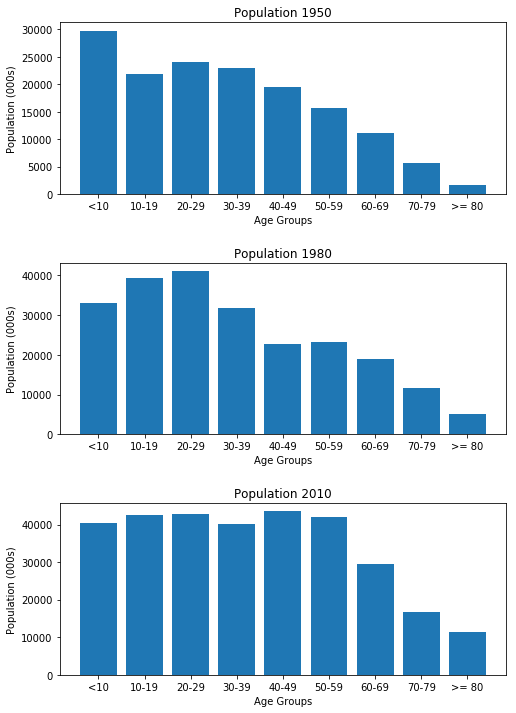

In [6]:
# Create bar charts for calendar years 1950, 1980 and 2010 simply to provide info on the population distribution
plt.figure(figsize=(8,12))
plt.subplots_adjust(hspace=.4)

# create the 1950 bar chart
plt.subplot(3,1,1)
ax_1950 = plt.bar(age_groups,pop_1950)
plt.title('Population 1950')
plt.xlabel('Age Groups')
plt.ylabel('Population (000s)')

# create the 1980 bar chart
plt.subplot(3,1,2)
plt.title('Population 1980')
plt.xlabel('Age Groups')
plt.ylabel('Population (000s)')
ax_1980 = plt.bar(age_groups,pop_1980)

# create the 2010 bar chart
plt.subplot(3,1,3)
ax_2010 = plt.bar(age_groups,pop_2010)
plt.title('Population 2010')
plt.ylabel('Population (000s)')
plt.xlabel('Age Groups')

plt.show()


In [7]:
# Calculate the percent of population < 40 for each year

percent_U40 = []
percent_40_60 = []
percent_over_60 = []

for col in range(1,len(population.columns)): # for each year column
    pop_U40 = 0  # reset the U40 population to zero for each new year
    for row in range(4): # for each row with population under 40
        pop_U40 = population.iloc[row, col] + pop_U40
        tot_pop = population.iloc[9, col]
        pcnt_U40 = pop_U40/tot_pop * 100
    percent_U40.append(pcnt_U40)

# Calculate the percent of population between 40-60 for each year

for col in range(1,len(population.columns)): # for each year column
    pop_40_60 = 0  # reset the 40-60 population group to zero for each new year
    for row in range(4,6): # for each row with population between 40-60
        pop_40_60 = population.iloc[row, col] + pop_40_60
        tot_pop = population.iloc[9, col]
        pcnt_40_60 = pop_40_60/tot_pop * 100
    percent_40_60.append(pcnt_40_60)

# Calculate the percent of population > 60 for each year

for col in range(1,len(population.columns)): # for each year column
    pop_over_60 = 0  # reset the 40-60 population group to zero for each new year
    for row in range(6,9): # for each row with population between 40-60
        pop_over_60 = population.iloc[row, col] + pop_over_60
        tot_pop = population.iloc[9, col]
        pcnt_over_60 = pop_over_60/tot_pop * 100
    percent_over_60.append(pcnt_over_60)

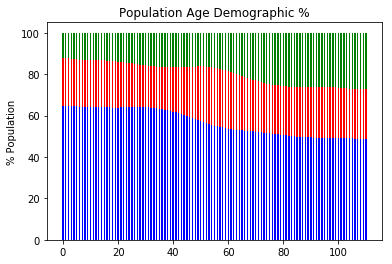

In [8]:
# Create stacked bar chart with 3 age groups (Under 40, 40-60, 60+)

bar_U40 = [i for i in range(len(percent_U40))] # creates the x-axis values...really want to change this to years
bottom_over_60 = [i+j for i,j in zip(percent_U40, percent_40_60)] # add the values of percent_U40 and percent_40_60 to create
    # the starting value to which we will add the percent_over_60
    

plt.bar(bar_U40, percent_U40, width=.5, color='b')
plt.bar(bar_U40, percent_40_60, bottom=percent_U40, width=.5, color='r')
plt.bar(bar_U40, percent_over_60, bottom=bottom_over_60, width=.5, color='g')
plt.ylabel('% Population')
plt.title('Population Age Demographic %')
plt.show()

In [9]:
# Create a dataframe with every 10th year (i.e. 1950, 1960, 1970,  etc)
pop_10th = population[population.columns[1::10]]
pop_10th.head()

,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060
0,29785.0,39151.0,37086.0,33054.0,36933.0,39642.0,40521.0,43115.0,44703.0,45891.0,48098.0,49635.0
1,21888.0,30368.0,40186.0,39347.0,34984.0,40933.0,42664.0,41422.0,44310.0,46067.0,47324.0,49587.0
2,24042.0,22070.0,30938.0,41072.0,40427.0,38397.0,42849.0,45016.0,44653.0,48013.0,49955.0,51354.0
3,23021.0,24525.0,22742.0,31819.0,41929.0,43175.0,40150.0,44774.0,47762.0,47927.0,51462.0,53545.0
4,19432.0,22593.0,24146.0,22777.0,31622.0,42738.0,43544.0,40369.0,45338.0,48596.0,48917.0,52515.0


In [10]:
# Calculate the percent of population < 40 for each 10th year (i.e. 1950, 1960, 1970, etc)

percent2_U40 = []
percent2_40_60 = []
percent2_over_60 = []

for col in range(0,len(pop_10th.columns)): # for each year column
    pop_U40 = 0  # reset the U40 population to zero for each new year
    for row in range(4): # for each row with population under 40
        pop_U40 = pop_10th.iloc[row, col] + pop_U40
        tot_pop = pop_10th.iloc[9, col]
        pcnt_U40 = pop_U40/tot_pop * 100
    percent2_U40.append(pcnt_U40)

# Calculate the percent of population between 40-60 for each year

for col in range(0,len(pop_10th.columns)): # for each year column
    pop_40_60 = 0  # reset the 40-60 population group to zero for each new year
    for row in range(4,6): # for each row with population between 40-60
        pop_40_60 = pop_10th.iloc[row, col] + pop_40_60
        tot_pop = pop_10th.iloc[9, col]
        pcnt_40_60 = pop_40_60/tot_pop * 100
    percent2_40_60.append(pcnt_40_60)

# Calculate the percent of population > 60 for each year

for col in range(0,len(pop_10th.columns)): # for each year column
    pop_over_60 = 0  # reset the 40-60 population group to zero for each new year
    for row in range(6,9): # for each row with population between 40-60
        pop_over_60 = pop_10th.iloc[row, col] + pop_over_60
        tot_pop = pop_10th.iloc[9, col]
        pcnt_over_60 = pop_over_60/tot_pop * 100
    percent2_over_60.append(pcnt_over_60)

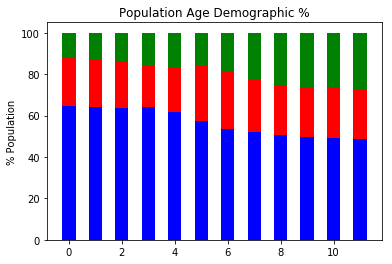

In [11]:
# Create bar chart (same as above chart, just for every 10th year)

bar2_U40 = [i for i in range(len(percent2_U40))] # for X-axis, but really want to add Year labels
bottom2_over_60 = [i+j for i,j in zip(percent2_U40, percent2_40_60)] # add the values of percent_U40 and percent_40_60 to create
    # the starting value to which we will add the percent_over_60
    

plt.bar(bar2_U40, percent2_U40, width=.5, color='b')
plt.bar(bar2_U40, percent2_40_60, bottom=percent2_U40, width=.5, color='r')
plt.bar(bar2_U40, percent2_over_60, bottom=bottom2_over_60, width=.5, color='g')
plt.ylabel('% Population')
plt.title('Population Age Demographic %')
plt.show()

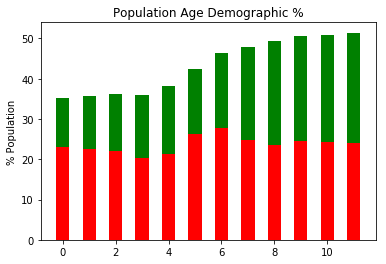

In [12]:
# Create bar chart with just 2 age demographics (40-60 and 60+)

plt.bar(bar2_U40, percent2_40_60, width=.5, color='r')
plt.bar(bar2_U40, percent2_over_60, bottom=percent2_40_60, width=.5, color='g')
plt.ylabel('% Population')
plt.title('Population Age Demographic %')
plt.show()

# Evaluate the Statistical Correlation Between M/O and PE Ratio for S&P 500

In [8]:
pe_mo.head()

,Unnamed: 0,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,P/E,7.00,9.60,10.90,9.90,12.60,12.50,13.60,12.00,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M/O,1.74,1.73,1.72,1.71,1.70,1.70,1.69,1.69,1.69,...,1.13,1.13,1.12,1.12,1.12,1.12,1.12,1.12,1.13,1.14
2,M/Y,0.81,0.83,0.86,0.88,0.91,0.94,0.96,0.99,1.00,...,0.98,0.98,0.99,0.99,1.00,1.00,1.01,1.01,1.02,1.02


In [32]:
pe_mo.index=pe_mo.iloc[:,0]
pe_mo=pe_mo.iloc[:,1:]
pe_mo.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
P/E,7.00,9.60,10.90,9.90,12.60,12.50,13.60,12.00,18.50,17.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M/O,1.74,1.73,1.72,1.71,1.70,1.70,1.69,1.69,1.69,1.69,...,1.13,1.13,1.12,1.12,1.12,1.12,1.12,1.12,1.13,1.14
M/Y,0.81,0.83,0.86,0.88,0.91,0.94,0.96,0.99,1.00,1.01,...,0.98,0.98,0.99,0.99,1.00,1.00,1.01,1.01,1.02,1.02


In [33]:
pe_mo2 = pe_mo.T
pe_mo2.head()

Unnamed: 0,P/E,M/O,M/Y
1950,7.0,1.74,0.81
1951,9.6,1.73,0.83
1952,10.9,1.72,0.86
1953,9.9,1.71,0.88
1954,12.6,1.70,0.91


In [34]:
pe_mo2['P/E'].corr(pe_mo2['M/O'])

0.4720194847659365

In [38]:
pe_mo2['P/E'].corr(pe_mo2['M/Y'])

0.5823466921479908

In [12]:
# Extract a slice of the MO ratios from 1950 onwards
mo = pe_mo.loc[[1],'1950'::]


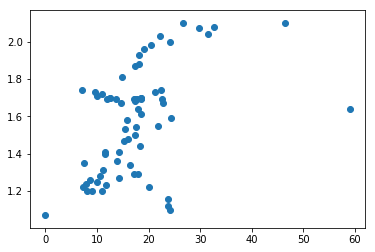

In [37]:
plt.scatter(pe_mo2['P/E'],pe_mo2['M/O'])
plt.show()